## Importing Dependencies

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [4]:
def read_goog_sp500_dataframe():
    googFile = 'data/GOOG.csv'
    spFile = 'data/SP_500.csv'
    
    goog = pd.read_csv(googFile,sep=',',usecols=[0,5],names=['Date','Goog'],header=0)
    sp = pd.read_csv(spFile,sep=',',usecols=[0,5],names=['Date','SP500'],header=0)
    
    goog['SP500'] = sp['SP500']
    
    goog['Date'] = pd.to_datetime(goog['Date'],format='%Y-%m-%d')
    
    goog = goog.sort_values(['Date'],ascending=True)
    
    returns = goog[[key for key in dict(goog.dtypes) if dict(goog.dtypes)[key] in ['float64','int64']]].pct_change()
    
    return returns

In [5]:
def read_goog_sp500_data():
    returns = read_goog_sp500_dataframe()
    xData = np.array(returns["SP500"])[1:]
    yData = np.array(returns["Goog"])[1:]
    return (xData,yData)

## Scikit Learn Benchmark 

In [6]:
from sklearn import datasets, linear_model

In [7]:
xData, yData = read_goog_sp500_data()

In [8]:
googModel = linear_model.LinearRegression()

In [9]:
googModel.fit(xData.reshape(-1,1),yData.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
googModel.coef_

array([[1.06768973]])

In [11]:
googModel.intercept_

array([0.0084649])

In [12]:
pred = googModel.predict(xData.reshape(-1,1))

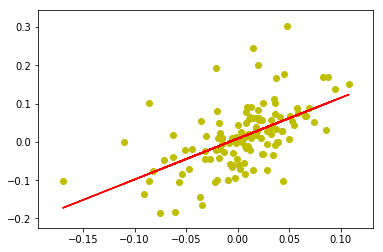

In [13]:
plt.scatter(xData,yData,c='y')
plt.plot(xData,pred,c='r')
plt.show()

#### Squared Error

In [14]:
error = np.sum(np.square(pred-yData.reshape(-1,1)))

In [15]:
print(error)

0.5796166072844982


#### Mean Squarred Error

In [16]:
sum_error = np.sqrt(error)

In [17]:
print(sum_error)

0.7613255593269532


## Tensorflow Implementation

In [80]:
import tensorflow as tf

In [81]:
w = tf.Variable(tf.zeros([1,1]),name='w',dtype=tf.float32)
b = tf.Variable(tf.zeros([1]),name='b',dtype=tf.float32)

In [82]:
x = tf.placeholder(dtype=tf.float32,shape=[None,1],name='x')

In [83]:
y_ = tf.placeholder(dtype=tf.float32,shape=[None,1],name='y_')

In [84]:
wx = tf.matmul(x,w)
y = wx+b

In [85]:
loss = tf.reduce_sum(tf.square(y_ - y))

In [86]:
optimizer = tf.train.FtrlOptimizer(0.1)

In [87]:
train = optimizer.minimize(loss)

In [88]:
dataset_size = len(xData)

In [92]:
def trainWithMultiplePointsPerEpoch(steps, train_step, batch_size):
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(steps):
            if dataset_size==batch_size:
                batch_start_idx = 0
            elif dataset_size<batch_size:
                raise ValueError("Dataset size %d must be greater than Batch size %d"%(dataset_size,batch_size))
            else:
                batch_start_idx = (i * batch_size) % (dataset_size)
            batch_end_idx = batch_start_idx + batch_size
            
            #Acess the x and y values in batches
            batch_xs = xData[batch_start_idx:batch_end_idx]
            batch_ys = yData[batch_start_idx:batch_end_idx]
            feed_dict = {x:batch_xs.reshape(-1,1),y_:batch_ys.reshape(-1,1)}
            sess.run(train_step,feed_dict=feed_dict)
            if (i)%100==0:
                print("After {} iteration.".format(i))
                print("w: {}".format(sess.run(w)))
                print("b: {}".format(sess.run(b)))
        trained_w = sess.run(w)
        trained_b = sess.run(b)
    return trained_w, trained_b

In [93]:
trained_w,trained_b = trainWithMultiplePointsPerEpoch(10000,train,100)

After 0 iteration.
w: [[0.08205541]]
b: [0.09901493]
After 100 iteration.
w: [[0.8150959]]
b: [0.00898862]
After 200 iteration.
w: [[0.9475568]]
b: [0.01012184]
After 300 iteration.
w: [[0.9825012]]
b: [0.01041563]
After 400 iteration.
w: [[0.9921248]]
b: [0.00923481]
After 500 iteration.
w: [[0.9993559]]
b: [0.01105842]
After 600 iteration.
w: [[0.9994891]]
b: [0.00803257]
After 700 iteration.
w: [[0.99726444]]
b: [0.00994576]
After 800 iteration.
w: [[0.99307686]]
b: [0.00699291]
After 900 iteration.
w: [[0.99487257]]
b: [0.00600012]
After 1000 iteration.
w: [[0.9969387]]
b: [0.00848509]
After 1100 iteration.
w: [[1.0028144]]
b: [0.00958321]
After 1200 iteration.
w: [[1.0013763]]
b: [0.00808819]
After 1300 iteration.
w: [[0.99543774]]
b: [0.01177861]
After 1400 iteration.
w: [[0.995677]]
b: [0.01034882]
After 1500 iteration.
w: [[0.99452174]]
b: [0.00979003]
After 1600 iteration.
w: [[1.0000916]]
b: [0.00931873]
After 1700 iteration.
w: [[1.0008686]]
b: [0.00688411]
After 1800 iterat

In [97]:
xData = xData.reshape(-1,1)
yData = yData.reshape(-1,1)
print(xData.shape)
print(yData.shape)

(126, 1)
(126, 1)


In [98]:
trained_b

array([0.00820208], dtype=float32)

In [99]:
trained_w

array([[0.9954653]], dtype=float32)

In [100]:
a = trained_w*xData + trained_b

In [114]:
colors = [tuple(np.abs(255 * np.random.randn(3))%255) for i in range(5)]

In [117]:
colors = list(colors)

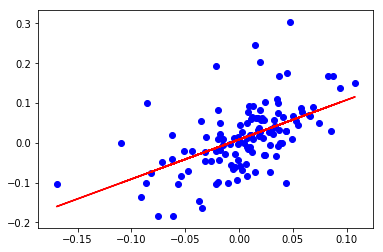

In [120]:
plt.plot(xData,a,c='r')
plt.scatter(xData,yData,c='b')
plt.show()

### Better Explanation of Data

In [4]:
googFile = 'data/GOOG.csv'
spFile = 'data/SP_500.csv'

In [7]:
df1 = pd.read_csv(googFile,sep=',',usecols=[0,5],names=['Date','Goog'],header=0)

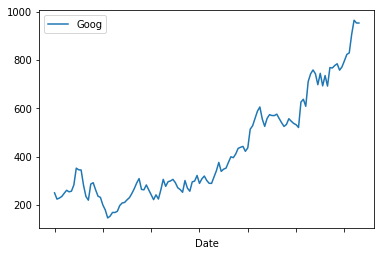

In [14]:
df1.plot(x='Date',y='Goog')
plt.show()

In [15]:
df2 = pd.read_csv(spFile,sep=',',usecols=[0,5],names=['Date','SP500'],header=0)

In [16]:
df2.head()

,Date,SP500
0,2007-01-01,1438.239990
1,2007-02-01,1406.819946
2,2007-03-01,1420.859985
3,2007-04-01,1482.369995
4,2007-05-01,1530.619995


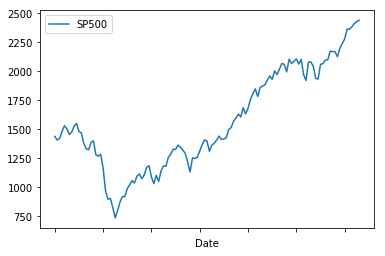

In [17]:
df2.plot(x='Date',y='SP500')

In [18]:
df1['SP500'] = df2['SP500']

In [19]:
df1.keys()

Index(['Date', 'Goog', 'SP500'], dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B38C3C5C0>],
      dtype=object)

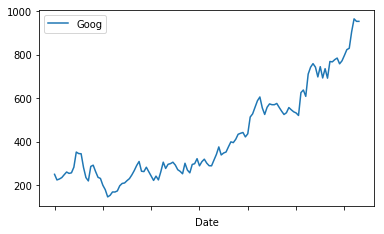

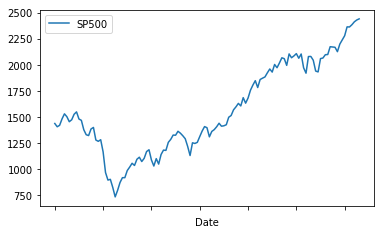

In [22]:
df1.plot(x='Date',y='Goog',subplots=True)
df1.plot(x='Date',y='SP500',subplots=True)

In [23]:
df1.head()

,Date,Goog,SP500
0,2007-01-01,249.813644,1438.239990
1,2007-02-01,223.885818,1406.819946
2,2007-03-01,228.224564,1420.859985
3,2007-04-01,234.809875,1482.369995
4,2007-05-01,248.025345,1530.619995


In [25]:
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d')

In [26]:
df1.head()

,Date,Goog,SP500
0,2007-01-01,249.813644,1438.239990
1,2007-02-01,223.885818,1406.819946
2,2007-03-01,228.224564,1420.859985
3,2007-04-01,234.809875,1482.369995
4,2007-05-01,248.025345,1530.619995


In [28]:
df1 = df1.sort_values('Date')

In [35]:
returns = df1[[key for key in dict(df1.dtypes) if dict(df1.dtypes)[key] in ['float64','int64']]].pct_change()

In [37]:
xData = np.array(df1['SP500'][1:])

In [39]:
yData = np.array(df1['Goog'][1:])